In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Funções

In [8]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def rosenbrock(x, n):
    return sum(100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(n-1))

# versoes das funcoes sem n
def rosenbrock_(x):
    n = len(x)
    return rosenbrock(x, n)


In [10]:
def grad_himmelblau(x):
    return [4*x[0]**3 + 4*x[0]*x[1] -42*x[0] + 2*x[1]**2 -14,
            4*x[1]**3 + 4*x[0]*x[1] -26*x[1] + 2*x[0]**2 -22]

def first_grad_rosenbrock(x):
    return 400*x[0]**3 + 2*x[0] - 400*x[1]*x[0] - 2

def last_grad_rosenbrock(x):
    return 200*x[-1] - 200*x[-2]**2

def middle_grad_rosenbrock(x,i):
    return 400*x[i]**3 + 202*x[i] - 400*x[i+1]*x[i] - 200*x[i-1]**2 - 2

def grad_rosenbrock(x,n):
    
    grad = []

    if n == 1:
        return IndexError 
    if n == 2:
        grad.append(first_grad_rosenbrock(x))
        grad.append(last_grad_rosenbrock(x))
        return grad
    else:
        grad.append(first_grad_rosenbrock(x))
        
        for i in range(1,n-1):
            grad.append(middle_grad_rosenbrock(x,i))  

        grad.append(last_grad_rosenbrock(x))
    
    return grad

In [11]:
# Hessians
def hess_himmelblau(x):
    
    return [[8*x[0]**2 + 4 * (x[0]**2 + x[1] - 11) + 2,  4 * (x[0] + x[1])],
            [4 * (x[0] + x[1]),                          8*x[1]**2 + 4 * (x[0] + x[1]**2 - 7) + 2]]

def hess_rosenbrock(x):
    n = len(x)
    if n == 1:
        return IndexError

    hess = np.zeros((n,n))

    hess[0,0] = 1200*x[0]**2 - 400*x[1] + 2
    hess[0,1] = -400*x[0]
    hess[1,0] = -400*x[0]

    for i in range(1,n-1):
        hess[i,i] = 1200*x[i]**2 - 400*x[i+1] + 202
        # hess[i,i-1] = -400*x[i-1]
        hess[i+1,i] = -400*x[i] 

    hess[-1,-1] = 200

    return hess

In [12]:
def line_search_def(func, grad, x, d):
    alpha = 1.0
    c = 0.3  # Constante de Armijo
    rho = 0.5  # Fator de redução
    while func(x + alpha * d) > func(x) + c * alpha * np.dot(grad(x), d):
        alpha *= rho

    return alpha

## Busca linear por Armijo

condição: $$ f(x + \alpha \cdot d) \le f(x) + c \cdot  \alpha  \nabla f(x)^T \cdot d $$


In [13]:
def f(x):
    return x - 2 * x**3 + x**4

# Derivada da função
def df(x):
    return 1 - 6 * x**2 + 4 * x**3


# Função de busca de linha usando o método de Armijo
def line_search(func, grad, x, d):
    alpha = 1.0
    c = 0.3  # Constante de Armijo
    rho = 0.5  # Fator de redução
    
    # Lista para armazenar os pontos x encontrados
    xs = [x]
    alphas = [alpha]
    
    while func(x + alpha * d) > func(x) + c * alpha * np.dot(grad(x), d):
        alpha *= rho
        xs.append(x + alpha * d)  # Armazena os pontos x encontrados
        alphas.append(alpha)
    return xs, alphas

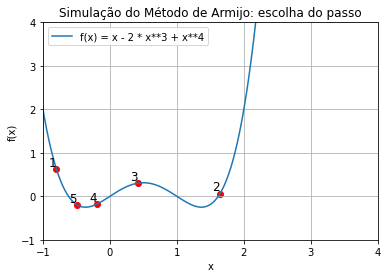

In [14]:

# Parâmetros da simulação
x_initial = -0.8 # Ponto inicial
d_initial = -df(x_initial)  # Direção de descida inicial

# Encontra os pontos x e alpha usando a função line_search
x_values = line_search(f, df, x_initial, d_initial)[0]
alphas = line_search(f, df, x_initial, d_initial)[1]

# Plotagem da função e das retas tangentes
x_range = np.linspace(-2, 4, 400)
plt.plot(x_range, f(x_range), label='f(x) = x - 2 * x**3 + x**4')

for i, x in enumerate(x_values):
    plt.scatter(x, f(x), color='red')
    plt.text(x, f(x), str(i+1), verticalalignment='bottom', horizontalalignment='right', fontsize=12)
plt.title('Simulação do Método de Armijo: escolha do passo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-1, 4)
plt.xlim(-1, 4) 
plt.legend()
plt.grid(True)
plt.show()

Isto significa que procuramos um passo cuja redução na função seja pelo menos
uma fração c da redução obtida no modelo linear. 

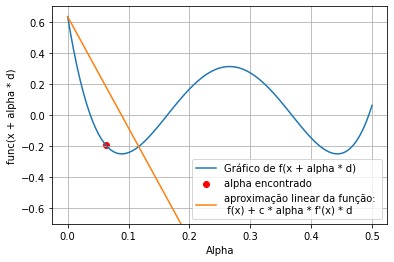

In [15]:
# Define o intervalo de alphas


alpha_range = np.linspace(0, 0.5, 100)
def teta(alpha):
    return f(x_initial + alpha * d_initial)

def dteta(alpha):
    return f(x_initial) + 0.3 * alpha * np.dot(df(x_initial), d_initial)
# Encontra os valores da função para diferentes alphas
y_values = [teta(alpha) for alpha in alpha_range]

y_values_tangente = [ dteta(alpha) for alpha in alpha_range] 

# Plotagem da função func(x + alpha * d) para todo alpha
plt.plot(alpha_range, y_values, label='Gráfico de f(x + alpha * d)')
plt.scatter(alphas[4], teta(alphas[4]), color='red', label='alpha encontrado')
plt.plot(alpha_range, y_values_tangente, label='aproximação linear da função: \n f(x) + c * alpha * f\'(x) * d')
plt.xlabel('Alpha')
plt.ylabel('func(x + alpha * d)')
plt.ylim(-0.7, 0.7)
plt.grid(True)
plt.legend()
plt.show()

## Gradiente 




In [16]:
import time
    
def gradient_method(func, grad, x0, tol=1e-5, max_iter=1000, n=2):
    data_points = [x0]
    iteration = 0
    x0 = np.array(x0)
    x1 = np.array([1000, 1000])

    start_it_time = time.time()
    start_time = time.time()
    times = []

    while iteration < max_iter:
        iteration+=1
        direction = -np.array(grad(x0))

        
        alpha = line_search_def(func, grad, x0, direction)
        x1 = np.array(x0) + direction * alpha
        if  np.linalg.norm(grad(x0)) <= tol:
            total_time = time.time() - start_time
            return data_points[-1], iteration, data_points, np.array(times), total_time
        data_points.append(x1)
        x0 = x1

        times.append(time.time() - start_it_time)
        start_it_time = time.time()
    
    total_time = time.time() - start_time

    return data_points[-1], iteration, data_points, np.array(times), total_time


### himmelblau
<hr/>


$ f(3.0,2.0)=0.0 \\$
$ f(−2.805118, 3.131312) = 0.0 \\$
$ f(−3.779310,−3.283186) = 0.0 \\ $
$ f(3.584428, −1.848126) = 0.0 \\$




In [17]:
x0 = [0, 0]
sol1 = gradient_method(himmelblau, grad_himmelblau, x0, max_iter=1000)

x0 = [-1, -1]
sol2 = gradient_method(himmelblau,grad_himmelblau, x0, max_iter=1000)

x0 = [1.5, -2]
sol3 = gradient_method(himmelblau, grad_himmelblau, x0, max_iter=1000)

x0 = [-2,  1]
sol4 = gradient_method(himmelblau, grad_himmelblau, x0, max_iter=1000)

In [18]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

gradient_himmenblau = pd.DataFrame(data)

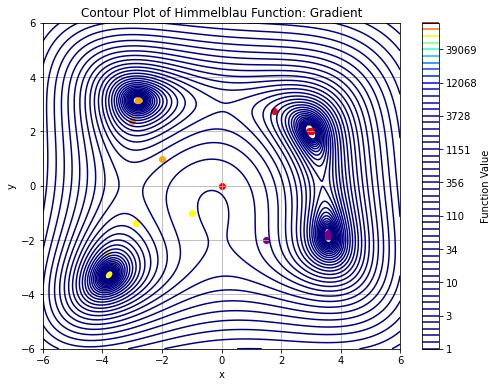

In [19]:

from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Himmelblau Function: Gradient')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


def plot_solution(frame):
    if frame < len(sol1[2]):
        ac.set_offsets(sol1[2][:frame+1])
        
    if frame < len(sol2[2]):
        bc.set_offsets(sol2[2][:frame+1])
        
    if frame < len(sol3[2]):
        cc.set_offsets(sol3[2][:frame+1])
        
    if frame < len(sol4[2]):
        dc.set_offsets(sol4[2][:frame+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=len(sol1[2])+1, interval=50, blit=True)
anim.save('himmelblau_animation_gradiente.gif', writer='pillow', fps=1)

### rosenbrock n=2
<hr/>

ponto ótimo: x = 1


In [20]:
def rosenbrock2(x):
    return rosenbrock(x, 2)

In [21]:
x0 = [0, 0]
sol1 = gradient_method(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=100000)

x0 = [-1, -1]
sol2 = gradient_method(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=100000)

x0 = [1.5, -2]
sol3 = gradient_method(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=100000)

x0 = [-2,  1]
sol4 = gradient_method(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=100000)

In [22]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

gradient_rosenbroc2 = pd.DataFrame(data)
gradient_rosenbroc2

,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter,1467,1840,1898,1960
mean_time_per_iter,0.000863,0.00086,0.000736,0.000458
total_time,1.266292,1.584582,1.399814,0.899922
solução,"[0.9999890474537222, 0.9999780503830522]","[0.9999900095140599, 0.9999799784440043]","[0.9999896998874611, 0.9999793579087355]","[0.9999892747040243, 0.9999785076570212]"


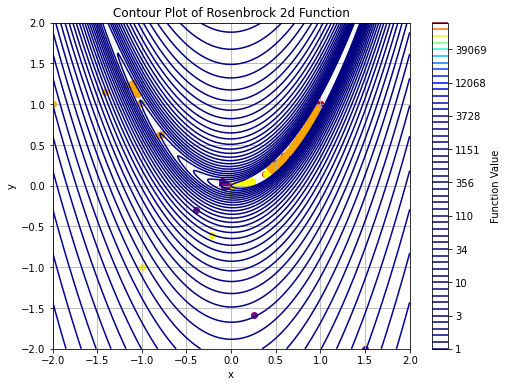

In [23]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y],2)
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Rosenbrock 2d Function')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


num_frames = 100
step = max(1, len(sol1[2]) // num_frames)

def plot_solution(frame):
    frame_index = frame * step
    ac.set_offsets(sol1[2][:frame_index+1])
    bc.set_offsets(sol2[2][:frame_index+1])
    cc.set_offsets(sol3[2][:frame_index+1])
    dc.set_offsets(sol4[2][:frame_index+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=num_frames, interval=50, blit=True)
anim.save('Rosenbrock_animation_gradient.gif', writer='pillow', fps=1)

### rosenbrock n=10
<hr/>

ponto ótimo: x = 1

In [24]:
def rosenbrock10(x):
    return rosenbrock(x, 10)

In [25]:
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol1 = gradient_method(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=100000)

x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
sol2 = gradient_method(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=100000)

x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]
sol3 = gradient_method(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=100000)

x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]
sol4 = gradient_method(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=100000)


In [26]:
data = {
    'x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

gradient_rosenbroc10 = pd.DataFrame(data)

## Newton

In [27]:
import time
def newton(f, f_grad, f_hess, x, tol=1e-5, max_iter=1000):

    cnt_iter = 0

    grad = np.array(f_grad(x))
    grad_module = np.linalg.norm(grad)

    x_values = [x]
    start_it_time = time.time()
    start_time = time.time()
    times = []
    grads = [grad]

    while grad_module > tol and cnt_iter < max_iter:
        cnt_iter += 1
        
        hess = np.array(f_hess(x))
        d = -np.dot(np.linalg.inv(hess), grad)
        
        alpha = line_search_def(f, f_grad, x, d)
        x = x + d*alpha
        
        grad = np.array(f_grad(x))
        grad_module = np.linalg.norm(grad)
        
        x_values.append(x)
        times.append(time.time() - start_it_time)
        start_it_time = time.time()
        grads.append(grad)
    
    total_time = time.time() - start_time
    return x, cnt_iter, x_values, np.array(times), total_time, grads

### himmelblau
<hr/>

In [28]:
x0 = [0, 0]
sol1 = newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [-1, -1]
sol2 = newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [1.5, -2]
sol3 = newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [-2,  1]
sol4 = newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

In [29]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0],
        'valor': himmelblau(sol1[0])
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0],
        'valor': himmelblau(sol2[0])
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0],
        'valor': himmelblau(sol3[0])
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0],
        'valor': himmelblau(sol4[0])
    },
    
    
}

newton_himmenblau = pd.DataFrame(data)
newton_himmenblau

,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter,1000,1000,1000,1000
mean_time_per_iter,0.004785,0.002158,0.002198,0.00223
total_time,4.78761,2.158228,2.200569,2.230633
solução,"[-3.498884683667642e-16, -8.881784197001254e-16]","[-0.9999999999999996, -1.0]","[-1.4459876543209869, -1.8711419753086418]","[-2.9322033898305087, 0.6694915254237273]"
valor,170.0,170.0,140.665241,92.948182


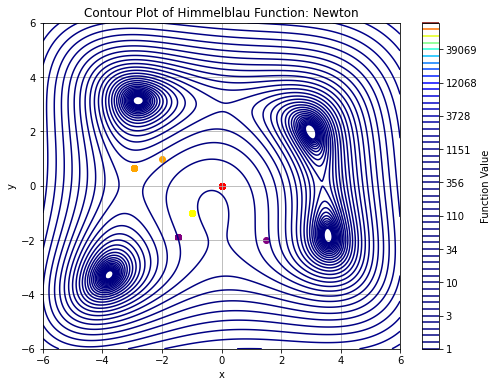

In [30]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Himmelblau Function: Newton')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


num_frames = 100
step = max(1, len(sol1[2]) // num_frames)


def plot_solution(frame):
    frame_index = frame * step
    if frame < len(sol1[2]):
        ac.set_offsets(sol1[2][:frame_index+1])
        
    if frame < len(sol2[2]):
        bc.set_offsets(sol2[2][:frame_index+1])
        
    if frame < len(sol3[2]):
        cc.set_offsets(sol3[2][:frame_index+1])
        
    if frame < len(sol4[2]):
        dc.set_offsets(sol4[2][:frame_index+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=num_frames, interval=50, blit=True)
anim.save('himmelblau_animation_newton.gif', writer='pillow', fps=1)

### rosenbrock n=2
<hr/>

ponto ótimo: x = 1

In [32]:
x0 = [0, 0]
sol1 = newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [-1, -1]
sol2 = newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [1.5, -2]
sol3 = newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [-2,  1]
sol4 = newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

In [33]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

newton_rosenbroc2 = pd.DataFrame(data)

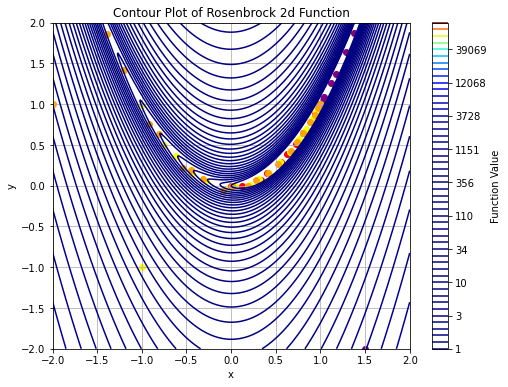

In [34]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Rosenbrock 2d Function')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


num_frames = 100
step = max(1, len(sol1[2]) // num_frames)

def plot_solution(frame):
    frame_index = frame * step
    ac.set_offsets(sol1[2][:frame_index+1])
    bc.set_offsets(sol2[2][:frame_index+1])
    cc.set_offsets(sol3[2][:frame_index+1])
    dc.set_offsets(sol4[2][:frame_index+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=num_frames, interval=50, blit=True)
anim.save('Rosenbrock_animation_newton.gif', writer='pillow', fps=1)

### rosenbrock n=10
<hr/>

ponto ótimo: x = 1

In [35]:
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol1 = newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
sol2 = newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]
sol3 = newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]
sol4 = newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

In [36]:
data = {
    'x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

newton_rosenbroc10 = pd.DataFrame(data)

## Newton Modificado

In [37]:
def modified_newton(f, f_grad, f_hess, x, tol=1e-5, max_iter=1000):
    n = len(x)

    cnt_iter = 0

    grad = np.array(f_grad(x))
    grad_module = np.linalg.norm(grad)

    x_values = [x]
    start_it_time = time.time()
    start_time = time.time()
    times = []
    grads = [grad]

    while grad_module > tol and cnt_iter < max_iter:
        cnt_iter += 1

        hess = np.array(f_hess(x))

        # find smaller eigenvalue of hess
        eig = np.linalg.eig(hess)
        min_eig = np.min(eig[0])

        epsilon = max(0, -min_eig + 1.0e-3)

        d = - np.dot(np.linalg.inv(hess + epsilon*np.eye(n)), grad)
        
        alpha = line_search_def(f, f_grad, x, d) # HERE: LINE SEARCH 
        x = x + d*alpha
        
        grad = np.array(f_grad(x))
        grad_module = np.linalg.norm(grad)

        x_values.append(x)
        times.append(time.time() - start_it_time)
        start_it_time = time.time()
        grads.append(grad)

    total_time = time.time() - start_time

    return x, cnt_iter, x_values, np.array(times), total_time, grads

### himmelblau
<hr/>

In [38]:
x0 = [0, 0]
sol1 = modified_newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [-1, -1]
sol2 = modified_newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [1.5, -2]
sol3 = modified_newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

x0 = [-2,  1]
sol4 = modified_newton(himmelblau, grad_himmelblau, hess_himmelblau, x0, max_iter=1000)

In [39]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0],
        'valor': himmelblau(sol1[0])
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0],
        'valor': himmelblau(sol2[0])
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0],
        'valor': himmelblau(sol3[0])
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0],
        'valor': himmelblau(sol4[0])
    },
    
    
}

newton_modified_himmenblau = pd.DataFrame(data)
newton_modified_himmenblau

,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter,6,6,4,6
mean_time_per_iter,0.001334,0.000666,0.001,0.000769
total_time,0.008004,0.003997,0.004001,0.004612
solução,"[3.5844283403306294, -1.8481265269659286]","[-3.7793102533785805, -3.2831859912865418]","[3.5844283403368107, -1.8481265270341443]","[-2.8051180869550096, 3.131312518250717]"
valor,0.0,0.0,0.0,0.0


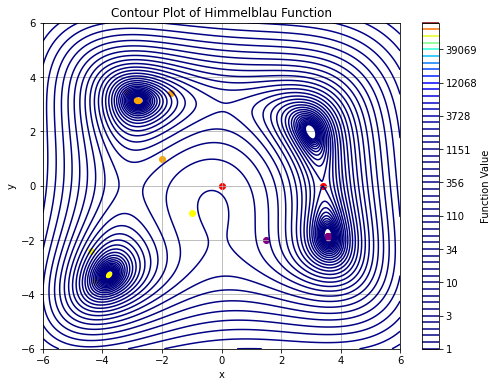

In [40]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Himmelblau Function')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


def plot_solution(frame):
    if frame < len(sol1[2]):
        ac.set_offsets(sol1[2][:frame+1])
        
    if frame < len(sol2[2]):
        bc.set_offsets(sol2[2][:frame+1])
        
    if frame < len(sol3[2]):
        cc.set_offsets(sol3[2][:frame+1])
        
    if frame < len(sol4[2]):
        dc.set_offsets(sol4[2][:frame+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=len(sol4[2])+1, interval=50, blit=True)
anim.save('himmelblau_animation_newton_modified.gif', writer='pillow', fps=1)

### rosenbrock n=2
<hr/>

ponto ótimo: x = 1

In [41]:
x0 = [0, 0]
sol1 = modified_newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [-1, -1]
sol2 = modified_newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [1.5, -2]
sol3 = modified_newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

x0 = [-2,  1]
sol4 = modified_newton(rosenbrock2, lambda x: grad_rosenbrock(x, 2), hess_rosenbrock, x0, max_iter=10000)

In [42]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

newton_modified_rosenbroc2 = pd.DataFrame(data)

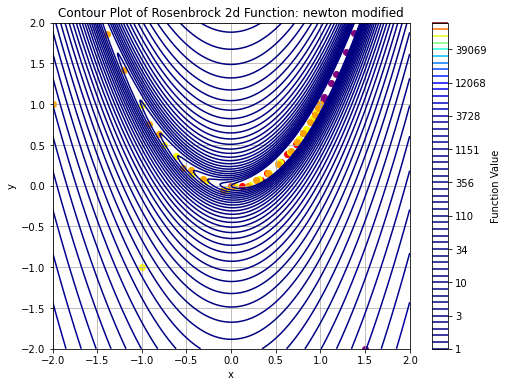

In [43]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Rosenbrock 2d Function: newton modified')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


num_frames = 100
step = max(1, len(sol1[2]) // num_frames)

def plot_solution(frame):
    frame_index = frame * step
    ac.set_offsets(sol1[2][:frame_index+1])
    bc.set_offsets(sol2[2][:frame_index+1])
    cc.set_offsets(sol3[2][:frame_index+1])
    dc.set_offsets(sol4[2][:frame_index+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=num_frames, interval=50, blit=True)
anim.save('Rosenbrock_animation_newton_modified.gif', writer='pillow', fps=1)

### rosenbrock n=10
<hr/>

ponto ótimo: x = 1

In [45]:
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol1 = modified_newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
sol2 = modified_newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]
sol3 = modified_newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]
sol4 = modified_newton(rosenbrock10, lambda x: grad_rosenbrock(x, 10), hess_rosenbrock, x0, max_iter=10000)

In [46]:
data = {
    'x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

newton_modified_rosenbroc10 = pd.DataFrame(data)

## Gradiente Conjugado




In [47]:
import time
def conjugate_gradient(func, grad, x0, tol=1e-5, max_iter=1000, q=10):
    
    cnt_iter = 0
    restart_counter = 0
    x = np.array(x0)
    x_values = [x]
    g = np.array(grad(x))
    grads = [g]
    
    start_it_time = time.time()
    start_time = time.time()
    times = []
    
    
    d = - g
    for _ in range(max_iter):
        cnt_iter +=1
        restart_counter += 1
        alpha = line_search_def(func, grad, x, d) 
        x = x + d*alpha
        x_values.append(x)
        g_prev = g
        g = np.array(grad(x))
        grads.append(g)
        if np.linalg.norm(g) < tol:
            total_time = time.time() - start_time
            return x, cnt_iter, x_values, np.array(times), total_time, grads
        betai = np.dot((g - g_prev).T, g) / np.dot(g_prev.T, g_prev)
        d = - g + betai*d
        times.append(time.time() - start_it_time)
        start_it_time = time.time()

    total_time = time.time() - start_time
    return x, cnt_iter, x_values, np.array(times), total_time, grads



### himmelblau
<hr/>


$ f(3.0,2.0)=0.0 \\$
$ f(−2.805118, 3.131312) = 0.0 \\$
$ f(−3.779310,−3.283186) = 0.0 \\ $
$ f(3.584428, −1.848126) = 0.0 \\$




In [48]:
x0 = [0, 0]
sol1 = conjugate_gradient(himmelblau, grad_himmelblau, x0, max_iter=1000)

x0 = [-1, -1]
sol2 = conjugate_gradient(himmelblau, grad_himmelblau, x0, max_iter=1000)

x0 = [1.5, -2]
sol3 = conjugate_gradient(himmelblau, grad_himmelblau, x0, max_iter=1000)

x0 = [-2,  1]
sol4 = conjugate_gradient(himmelblau, grad_himmelblau, x0, max_iter=1000)

In [49]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

conjugate_gradient_himmenblau = pd.DataFrame(data)

conjugate_gradient_himmenblau


,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter,25,20,16,22
mean_time_per_iter,0.000335,0.000394,0.000267,0.000476
total_time,0.009038,0.007491,0.004999,0.009996
solução,"[3.000000014969995, 2.0000001733305015]","[-3.779310293718146, -3.2831859793273637]","[3.584428275404252, -1.8481266939696992]","[-2.805118089988592, 3.1313124819524725]"


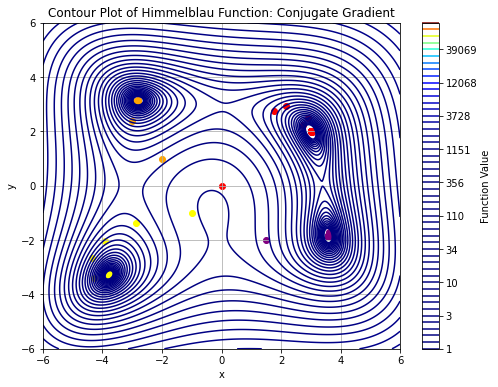

In [50]:

from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Himmelblau Function: Conjugate Gradient')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


def plot_solution(frame):
    if frame < len(sol1[2]):
        ac.set_offsets(sol1[2][:frame+1])
        
    if frame < len(sol2[2]):
        bc.set_offsets(sol2[2][:frame+1])
        
    if frame < len(sol3[2]):
        cc.set_offsets(sol3[2][:frame+1])
        
    if frame < len(sol4[2]):
        dc.set_offsets(sol4[2][:frame+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=len(sol1[2])+1, interval=50, blit=True)
anim.save('himmelblau_animation_conjugate_gradient.gif', writer='pillow', fps=1)

### rosenbrock n=2
<hr/>

ponto ótimo: x = 1


In [51]:
def rosenbrock2(x):
    return rosenbrock(x, 2)

In [52]:
x0 = [0, 0]
sol1 = conjugate_gradient(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=10000)

x0 = [-1, -1]
sol2 = conjugate_gradient(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=10000)

x0 = [1.5, -2]
sol3 = conjugate_gradient(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=10000)

x0 = [-2,  1]
sol4 = conjugate_gradient(rosenbrock2, lambda x: grad_rosenbrock(x, 2), x0, max_iter=10000)

In [53]:
data = {
    'x0 = [0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-1, -1]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [1.5, -2]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

conjugate_gradient_rosenbroc2  = pd.DataFrame(data)
conjugate_gradient_rosenbroc2

,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter,36,48,31,54
mean_time_per_iter,0.001162,0.00124,0.00111,0.000938
total_time,0.041393,0.059633,0.0353,0.050744
solução,"[1.000001109191724, 1.000002216482745]","[1.0000024027538843, 1.0000048136844222]","[1.0000094578749041, 1.000018947233123]","[1.000000391868116, 1.0000007647906375]"


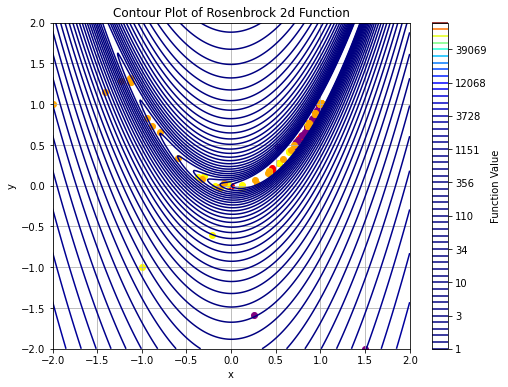

In [54]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(8, 6))
 
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock2([X, Y])
# Drawing the contour plot
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='jet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Rosenbrock 2d Function')
plt.colorbar(label='Function Value')
plt.grid(True)

ac = ax.scatter([], [], color='red')
bc = ax.scatter([], [], color='yellow')
cc = ax.scatter([], [], color='purple')
dc = ax.scatter([], [], color='orange')


num_frames = 100
step = max(1, len(sol1[2]) // num_frames)

def plot_solution(frame):
    frame_index = frame * step
    ac.set_offsets(sol1[2][:frame_index+1])
    bc.set_offsets(sol2[2][:frame_index+1])
    cc.set_offsets(sol3[2][:frame_index+1])
    dc.set_offsets(sol4[2][:frame_index+1])
    return ac,
    # Creating a grid of points
    
anim = FuncAnimation(fig, plot_solution, frames=num_frames, interval=50, blit=True)
anim.save('Rosenbrock_animation_conjugate_gradient.gif', writer='pillow', fps=1)

### rosenbrock n=10
<hr/>

ponto ótimo: x = 1

In [55]:
def rosenbrock10(x):
    return rosenbrock(x, 10)

In [56]:
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol1 = conjugate_gradient(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=10000)

x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
sol2 = conjugate_gradient(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=10000)

x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]
sol3 = conjugate_gradient(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=10000)

x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]
sol4 = conjugate_gradient(rosenbrock10, lambda x: grad_rosenbrock(x, 10), x0, max_iter=10000)

In [57]:
data = {
    'x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]': {
        'n_iter': sol1[1],
        'mean_time_per_iter': sol1[3].mean(),
        'total_time':  sol1[4],
        'solução': sol1[0]
    },
    'x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]': {
        'n_iter': sol2[1],
        'mean_time_per_iter': sol2[3].mean(),
        'total_time':  sol2[4],
        'solução': sol2[0]
    }, 
    'x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]': {
        'n_iter': sol3[1],
        'mean_time_per_iter': sol3[3].mean(),
        'total_time':  sol3[4],
        'solução': sol3[0]
    }, 
    'x0 = [-2,  1, -2,  1, -2,  1, -2,  1, -2,  1]': {
        'n_iter': sol4[1],
        'mean_time_per_iter': sol4[3].mean(),
        'total_time':  sol4[4],
        'solução': sol4[0]
    },
    
    
}

conjugate_gradient_rosenbroc10 = pd.DataFrame(data)

## Compare

### Resultados  Himmenblau

In [58]:
gradient_himmenblau.index = [i+ '_gradient' for i in gradient_himmenblau.index ]
newton_himmenblau.index = [i+ '_newton' for i in newton_himmenblau.index ]
newton_modified_himmenblau.index = [i+ '_newton_modified' for i in newton_modified_himmenblau.index ]
conjugate_gradient_himmenblau.index = [i + '_conjugate_gradient' for i in conjugate_gradient_himmenblau.index ]

In [67]:
compare_himmenblau = pd.concat([gradient_himmenblau, newton_himmenblau, newton_modified_himmenblau, conjugate_gradient_himmenblau])
compare_himmenblau.to_csv('../../data/compare_himmenblau.csv')
compare_himmenblau


,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter_gradient,21,14,24,13
mean_time_per_iter_gradient,0.000306,0.000307,0.000243,0.000216
total_time_gradient,0.007124,0.003988,0.0056,0.00259
solução_gradient,"[2.9999999065042386, 2.000000047356609]","[-3.7793102151419857, -3.2831859191226895]","[3.584428284442793, -1.848126460001735]","[-2.8051180970460434, 3.131312397570034]"
n_iter_newton,1000,1000,1000,1000
mean_time_per_iter_newton,0.004785,0.002158,0.002198,0.00223
total_time_newton,4.78761,2.158228,2.200569,2.230633
solução_newton,"[-3.498884683667642e-16, -8.881784197001254e-16]","[-0.9999999999999996, -1.0]","[-1.4459876543209869, -1.8711419753086418]","[-2.9322033898305087, 0.6694915254237273]"
valor_newton,170.0,170.0,140.665241,92.948182
n_iter_newton_modified,6,6,4,6


### Resultados Rosenbroc 2

In [60]:
gradient_rosenbroc2.index = [i+ '_gradient' for i in gradient_rosenbroc2.index ]
newton_rosenbroc2.index = [i+ '_newton' for i in newton_rosenbroc2.index ]
newton_modified_rosenbroc2.index = [i+ '_newton_modified' for i in newton_modified_rosenbroc2.index ]
conjugate_gradient_rosenbroc2.index = [i + '_conjugate_gradient' for i in conjugate_gradient_rosenbroc2.index ]

In [68]:
compare_rosenbroc2 = pd.concat([gradient_rosenbroc2, newton_rosenbroc2, newton_modified_rosenbroc2, conjugate_gradient_rosenbroc2])
compare_rosenbroc2.to_csv('../../data/compare_rosenbroc2.csv')
compare_rosenbroc2

,"x0 = [0, 0]","x0 = [-1, -1]","x0 = [1.5, -2]","x0 = [-2, 1]"
n_iter_gradient,1467,1840,1898,1960
mean_time_per_iter_gradient,0.000863,0.00086,0.000736,0.000458
total_time_gradient,1.266292,1.584582,1.399814,0.899922
solução_gradient,"[0.9999890474537222, 0.9999780503830522]","[0.9999900095140599, 0.9999799784440043]","[0.9999896998874611, 0.9999793579087355]","[0.9999892747040243, 0.9999785076570212]"
n_iter_newton,14,20,11,26
mean_time_per_iter_newton,0.000534,0.000451,0.000568,0.000572
total_time_newton,0.007473,0.009016,0.006249,0.015879
solução_newton,"[0.9999999999917982, 0.9999999999825355]","[0.9999999818931663, 0.9999999633611416]","[1.0000000000006712, 1.0000000000013312]","[0.9999999999685771, 0.9999999999338544]"
n_iter_newton_modified,14,20,11,26
mean_time_per_iter_newton_modified,0.000934,0.002181,0.002263,0.001037


### Resultados Rosenbroc 10

In [62]:
gradient_rosenbroc10.index = [i+ '_gradient' for i in gradient_rosenbroc10.index ]
newton_rosenbroc10.index = [i+ '_newton' for i in newton_rosenbroc10.index ]
newton_modified_rosenbroc10.index = [i+ '_newton_modified' for i in newton_modified_rosenbroc10.index ]
conjugate_gradient_rosenbroc10.index = [i + '_conjugate_gradient' for i in conjugate_gradient_rosenbroc10.index ]

In [69]:
compare_rosenbroc10 = pd.concat([gradient_rosenbroc10, newton_rosenbroc10, newton_modified_rosenbroc10, conjugate_gradient_rosenbroc10])
compare_rosenbroc10.to_csv('../../data/compare_rosenbroc10.csv')
compare_rosenbroc10

,"x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","x0 = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]","x0 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10]","x0 = [-2, 1, -2, 1, -2, 1, -2, 1, -2, 1]"
n_iter_gradient,17531,17569,17967,17576
mean_time_per_iter_gradient,0.001042,0.001869,0.001444,0.002385
total_time_gradient,18.275073,32.860795,25.972302,41.940176
solução_gradient,"[0.9999999718707946, 0.9999999424456817, 0.999...","[0.9999999715267363, 0.9999999441692349, 0.999...","[0.9999999719424808, 0.9999999450085844, 0.999...","[0.9999999715438519, 0.9999999441846, 0.999999..."
n_iter_newton,4648,4653,4654,4655
mean_time_per_iter_newton,0.000628,0.000539,0.000589,0.000691
total_time_newton,2.925272,2.513571,2.748278,3.222222
solução_newton,"[0.9999999831749299, 0.9999999662657347, 0.999...","[0.9999999831702697, 0.999999966256391, 0.9999...","[0.9999999831710555, 0.9999999662579666, 0.999...","[0.9999999831798718, 0.9999999662756432, 0.999..."
n_iter_newton_modified,4648,4654,4653,4655
mean_time_per_iter_newton_modified,0.001447,0.000649,0.000832,0.000486
